In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def min_max_scaler(data):
    numerator=data-np.min(data, axis=0)
    denominator=np.max(data,axis=0)-np.min(data, axis=0)
    return numerator/denominator#정규화(0~1사이의 값으로 변환)

In [47]:
df=pd.read_csv('C:/workspace/AI/data/서울시_통합/서울_일사량_오존_데이터.csv', encoding='CP949')
df

,\t\t지점번호,지점명,일시,일조합(hr),일조율(%),일사합(MJ/m2),평균기온(℃),최고기온(℃),O3
0,108,서울,2012-01-01,4.4,45.8,4.90,-3.0,0.4,0.010243
1,108,서울,2012-01-02,5.9,61.5,6.16,-4.8,-1.2,0.006467
2,108,서울,2012-01-03,2.7,28.1,4.46,-4.5,-0.2,0.007717
3,108,서울,2012-01-04,8.1,83.5,8.05,-7.4,-4.3,0.017758
4,108,서울,2012-01-05,9.0,92.8,9.14,-5.7,-1.3,0.010667
...,...,...,...,...,...,...,...,...,...
3648,108,서울,2021-12-27,3.8,39.6,6.09,-7.6,-3.9,0.008675
3649,108,서울,2021-12-28,1.7,17.7,4.32,-4.1,-0.9,0.002985
3650,108,서울,2021-12-29,1.8,18.8,4.64,0.4,5.9,0.010167
3651,108,서울,2021-12-30,7.3,76.0,9.14,-3.9,0.2,0.024358


In [48]:
from sklearn.preprocessing import MinMaxScaler

df.drop('\t\t지점번호', axis=1, inplace=True)
df.drop('지점명', axis=1, inplace=True)
df.drop('일시', axis=1, inplace=True)
df.drop('일조율(%)', axis=1, inplace=True)
df.drop('평균기온(℃)', axis=1, inplace=True)
df.drop('일조합(hr)', axis=1, inplace=True)

df

,일사합(MJ/m2),최고기온(℃),O3
0,4.90,0.4,0.010243
1,6.16,-1.2,0.006467
2,4.46,-0.2,0.007717
3,8.05,-4.3,0.017758
4,9.14,-1.3,0.010667
...,...,...,...
3648,6.09,-3.9,0.008675
3649,4.32,-0.9,0.002985
3650,4.64,5.9,0.010167
3651,9.14,0.2,0.024358


In [49]:
df= df.fillna(df.mean())

print(df)

      일사합(MJ/m2)  최고기온(℃)        O3
0           4.90      0.4  0.010243
1           6.16     -1.2  0.006467
2           4.46     -0.2  0.007717
3           8.05     -4.3  0.017758
4           9.14     -1.3  0.010667
...          ...      ...       ...
3648        6.09     -3.9  0.008675
3649        4.32     -0.9  0.002985
3650        4.64      5.9  0.010167
3651        9.14      0.2  0.024358
3652       11.70     -3.9  0.028505

[3653 rows x 3 columns]


In [50]:
null_rows = df[df.isnull().any(axis=1)]
print(null_rows)

Empty DataFrame
Columns: [일사합(MJ/m2), 최고기온(℃), O3]
Index: []


In [51]:
df = df.to_numpy()
df.size

10959

In [52]:
test=df[::-1]
test

array([[ 1.17000000e+01, -3.90000000e+00,  2.85050000e-02],
       [ 9.14000000e+00,  2.00000000e-01,  2.43583333e-02],
       [ 4.64000000e+00,  5.90000000e+00,  1.01666667e-02],
       ...,
       [ 4.46000000e+00, -2.00000000e-01,  7.71666667e-03],
       [ 6.16000000e+00, -1.20000000e+00,  6.46666667e-03],
       [ 4.90000000e+00,  4.00000000e-01,  1.02433333e-02]])

In [53]:
seq_length=10
input_feature=3
train_size=int(len(df)*0.95)     
train_input=df[0:train_size]
test_set=df[train_size-seq_length:]
print(train_input.size)
print(test_set.size)

10410
579


In [54]:
print(train_input.shape, test_set.shape)

(3470, 3) (193, 3)


In [55]:
train_set=min_max_scaler(train_input)
test_set=min_max_scaler(test_set)
print(train_set,test_set)

[[0.16042078 0.22067594 0.10945501]
 [0.20184089 0.1888668  0.06007714]
 [0.14595661 0.20874751 0.07642021]
 ...
 [0.46285339 0.77733598 0.38458521]
 [0.53254438 0.78528827 0.3619664 ]
 [0.67619987 0.82902584 0.52378462]] [[0.6813071  0.8196347  0.65147684]
 [0.65530569 0.80365297 0.6735477 ]
 [0.5959241  0.80593607 0.691365  ]
 [0.83977512 0.84018265 0.67827716]
 [0.47083626 0.77625571 0.61045837]
 [0.76036543 0.86986301 0.72078289]
 [0.4455376  0.83333333 0.47696243]
 [0.46591708 0.81506849 0.50510128]
 [0.54040759 0.82420091 0.47422588]
 [0.69395643 0.87442922 0.69511288]
 [0.75017569 0.89269406 0.56893423]
 [0.23436402 0.75342466 0.46649216]
 [0.06500351 0.69406393 0.41137452]
 [0.41286015 0.78082192 0.62336774]
 [0.6433591  0.85388128 0.88759332]
 [0.38545327 0.83105023 0.5993932 ]
 [0.46591708 0.84703196 0.54305601]
 [0.47962052 0.83333333 0.50581516]
 [0.58186929 0.83333333 0.73369226]
 [0.23506676 0.79452055 0.75394866]
 [0.64160225 0.9086758  0.68065677]
 [0.37772312 0.8858447

In [56]:
def build_dataset(time_series,seq_length):
    dataX=[]
    dataY=[]
    for i in range(0,len(time_series)-seq_length):
        x=time_series[i:i+seq_length,:]
        y=time_series[i+seq_length,[-1]]
        print(x,'->',y)
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX),np.array(dataY)

In [57]:
print(train_set)
trainX,trainY=build_dataset(train_set,seq_length)
testX,testY=build_dataset(test_set,seq_length)

[[0.16042078 0.22067594 0.10945501]
 [0.20184089 0.1888668  0.06007714]
 [0.14595661 0.20874751 0.07642021]
 ...
 [0.46285339 0.77733598 0.38458521]
 [0.53254438 0.78528827 0.3619664 ]
 [0.67619987 0.82902584 0.52378462]]
[[0.16042078 0.22067594 0.10945501]
 [0.20184089 0.1888668  0.06007714]
 [0.14595661 0.20874751 0.07642021]
 [0.26397107 0.12723658 0.20770957]
 [0.29980276 0.18687873 0.11498987]
 [0.28106509 0.23856859 0.07214922]
 [0.27087442 0.25248509 0.03264257]
 [0.1574622  0.22067594 0.03854786]
 [0.17488494 0.26640159 0.03296943]
 [0.24621959 0.24254473 0.0960319 ]] -> [0.18820684]
[[0.20184089 0.1888668  0.06007714]
 [0.14595661 0.20874751 0.07642021]
 [0.26397107 0.12723658 0.20770957]
 [0.29980276 0.18687873 0.11498987]
 [0.28106509 0.23856859 0.07214922]
 [0.27087442 0.25248509 0.03264257]
 [0.1574622  0.22067594 0.03854786]
 [0.17488494 0.26640159 0.03296943]
 [0.24621959 0.24254473 0.0960319 ]
 [0.304405   0.1471173  0.18820684]] -> [0.07262862]
[[0.14595661 0.20874751 

In [41]:
print(trainX.shape,trainY.shape)
print(testX.shape,testY.shape)
print(testX)

(3460, 10, 3) (3460, 1)
(183, 10, 3) (183, 1)
[[[0.51515152 0.6813071  0.65147684]
  [0.54545455 0.65530569 0.6735477 ]
  [0.43181818 0.5959241  0.691365  ]
  ...
  [0.31818182 0.46591708 0.50510128]
  [0.3030303  0.54040759 0.47422588]
  [0.62121212 0.69395643 0.69511288]]

 [[0.54545455 0.65530569 0.6735477 ]
  [0.43181818 0.5959241  0.691365  ]
  [0.73484848 0.83977512 0.67827716]
  ...
  [0.3030303  0.54040759 0.47422588]
  [0.62121212 0.69395643 0.69511288]
  [0.56060606 0.75017569 0.56893423]]

 [[0.43181818 0.5959241  0.691365  ]
  [0.73484848 0.83977512 0.67827716]
  [0.17424242 0.47083626 0.61045837]
  ...
  [0.62121212 0.69395643 0.69511288]
  [0.56060606 0.75017569 0.56893423]
  [0.06818182 0.23436402 0.46649216]]

 ...

 [[0.67424242 0.28039353 0.24269014]
  [0.46212121 0.27301476 0.13242512]
  [0.45454545 0.24912157 0.20925667]
  ...
  [0.68939394 0.37631764 0.40194533]
  [0.28787879 0.18446943 0.10154972]
  [0.12878788 0.12227688 0.        ]]

 [[0.46212121 0.27301476 0.1

In [58]:
model=keras.Sequential()
model.add(keras.layers.LSTM(units=128, input_shape=(seq_length, input_feature), return_sequences=True))
model.add(keras.layers.LSTM(64, return_sequences=True))
model.add(keras.layers.LSTM(32, return_sequences=True))
model.add(keras.layers.LSTM(16, return_sequences=True))
model.add(keras.layers.LSTM(8, return_sequences=True))
model.add(keras.layers.LSTM(1, return_sequences=False))
model.add(keras.layers.Dense(4))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 10, 128)           67584     
                                                                 
 lstm_25 (LSTM)              (None, 10, 64)            49408     
                                                                 
 lstm_26 (LSTM)              (None, 10, 32)            12416     
                                                                 
 lstm_27 (LSTM)              (None, 10, 16)            3136      
                                                                 
 lstm_28 (LSTM)              (None, 10, 8)             800       
                                                                 
 lstm_29 (LSTM)              (None, 1)                 40        
                                                                 
 dense_4 (Dense)             (None, 4)                

In [59]:
model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.01))#,metrics='accuracy'
loss = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=200)

Epoch 1/200
109/109 [==============================] - 17s 47ms/step - loss: 0.0262 - val_loss: 0.0620
Epoch 2/200
109/109 [==============================] - 3s 23ms/step - loss: 0.0249 - val_loss: 0.0590
Epoch 3/200
109/109 [==============================] - 3s 23ms/step - loss: 0.0252 - val_loss: 0.0608
Epoch 4/200
109/109 [==============================] - 3s 23ms/step - loss: 0.0247 - val_loss: 0.0580
Epoch 5/200
109/109 [==============================] - 3s 23ms/step - loss: 0.0248 - val_loss: 0.0576
Epoch 6/200
109/109 [==============================] - 3s 23ms/step - loss: 0.0247 - val_loss: 0.0563
Epoch 7/200
109/109 [==============================] - 3s 23ms/step - loss: 0.0249 - val_loss: 0.0572
Epoch 8/200
109/109 [==============================] - 3s 23ms/step - loss: 0.0247 - val_loss: 0.0565
Epoch 9/200
109/109 [==============================] - 3s 23ms/step - loss: 0.0249 - val_loss: 0.0650
Epoch 10/200
109/109 [==============================] - 3s 23ms/step - loss: 0.02

109/109 [==============================] - 3s 24ms/step - loss: 0.0247 - val_loss: 0.0591
Epoch 81/200
109/109 [==============================] - 3s 24ms/step - loss: 0.0248 - val_loss: 0.0576
Epoch 82/200
109/109 [==============================] - 3s 24ms/step - loss: 0.0247 - val_loss: 0.0566
Epoch 83/200
109/109 [==============================] - 3s 24ms/step - loss: 0.0248 - val_loss: 0.0569
Epoch 84/200
109/109 [==============================] - 3s 24ms/step - loss: 0.0248 - val_loss: 0.0603
Epoch 85/200
109/109 [==============================] - 3s 24ms/step - loss: 0.0247 - val_loss: 0.0616
Epoch 86/200
109/109 [==============================] - 3s 24ms/step - loss: 0.0248 - val_loss: 0.0620
Epoch 87/200
109/109 [==============================] - 3s 23ms/step - loss: 0.0248 - val_loss: 0.0604
Epoch 88/200
109/109 [==============================] - 3s 24ms/step - loss: 0.0247 - val_loss: 0.0584
Epoch 89/200
109/109 [==============================] - 3s 25ms/step - loss: 0.0247 - 

109/109 [==============================] - 3s 24ms/step - loss: 0.0247 - val_loss: 0.0551
Epoch 160/200
109/109 [==============================] - 3s 24ms/step - loss: 0.0247 - val_loss: 0.0598
Epoch 161/200
109/109 [==============================] - 3s 24ms/step - loss: 0.0247 - val_loss: 0.0579
Epoch 162/200
109/109 [==============================] - 3s 24ms/step - loss: 0.0247 - val_loss: 0.0592
Epoch 163/200
109/109 [==============================] - 3s 25ms/step - loss: 0.0247 - val_loss: 0.0617
Epoch 164/200
109/109 [==============================] - 3s 24ms/step - loss: 0.0247 - val_loss: 0.0526
Epoch 165/200
109/109 [==============================] - 3s 24ms/step - loss: 0.0248 - val_loss: 0.0562
Epoch 166/200
109/109 [==============================] - 3s 24ms/step - loss: 0.0247 - val_loss: 0.0608
Epoch 167/200
109/109 [==============================] - 3s 24ms/step - loss: 0.0247 - val_loss: 0.0547
Epoch 168/200
109/109 [==============================] - 3s 25ms/step - loss: 

In [60]:
test_predict=model.predict(testX)
print(testY.shape,test_predict.shape)

6/6 [==============================] - 2s 7ms/step
(183, 1) (183, 4)


In [61]:
# Print predicted and actual values
for pred, actual in zip(test_predict, testY):
    print("예측값:", pred, "실제값:", actual)
    pred_scalar = pred[0] * (np.max(df,axis=0) - np.min(df, axis=0)) + np.min(df, axis=0)
    if np.any(pred_scalar <= 0.030):
        print("평가: 좋음", pred_scalar)
    elif np.any(pred_scalar <= 0.090):
        print("평가: 보통")
    elif np.any(pred_scalar <= 0.150):
        print("평가: 나쁨")
    else:
        print("평가: 매우나쁨")

예측값: [0.2776838  0.2776838  0.2776838  0.27768376] 실제값: [0.56893423]
평가: 좋음 [8.46714103 3.26749486 0.02311031]
예측값: [0.2776838  0.2776838  0.2776838  0.27768376] 실제값: [0.46649216]
평가: 좋음 [8.46714103 3.26749486 0.02311031]
예측값: [0.2776838  0.2776838  0.2776838  0.27768376] 실제값: [0.41137452]
평가: 좋음 [8.46714103 3.26749486 0.02311031]
예측값: [0.2776838  0.2776838  0.2776838  0.27768376] 실제값: [0.62336774]
평가: 좋음 [8.46714103 3.26749486 0.02311031]
예측값: [0.2776838  0.2776838  0.2776838  0.27768376] 실제값: [0.88759332]
평가: 좋음 [8.46714103 3.26749486 0.02311031]
예측값: [0.2776838  0.2776838  0.2776838  0.27768376] 실제값: [0.5993932]
평가: 좋음 [8.46714103 3.26749486 0.02311031]
예측값: [0.2776838  0.2776838  0.2776838  0.27768376] 실제값: [0.54305601]
평가: 좋음 [8.46714103 3.26749486 0.02311031]
예측값: [0.2776838  0.2776838  0.2776838  0.27768376] 실제값: [0.50581516]
평가: 좋음 [8.46714103 3.26749486 0.02311031]
예측값: [0.2776838  0.2776838  0.2776838  0.27768376] 실제값: [0.73369226]
평가: 좋음 [8.46714103 3.26749486 0.02311031]
예측

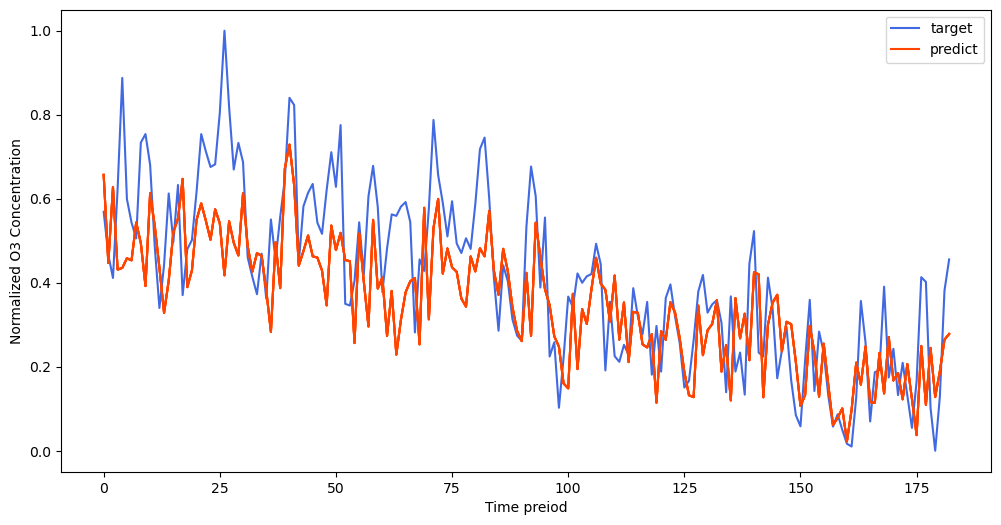

RMSE: 0.1512940274005608
MAE: 0.11804023291058034
R-squared: 0.4524752260252084


In [19]:
import os # LSTM layer 갯수 조절 - 6개 / 200번 러닝 / 뉴런 128개 / dense 4 /
# input - 일조합(hr), 일조율(%), 일사합(MJ/m2), 평균기온(℃), 최고기온(℃), O3(ppm)
os.environ['KMP_DUPLICATE_LIB_OK']='True'
plt.figure(figsize=(12, 6))  # 그래프 크기 조정
plt.plot(testY,'#4169E1')
plt.plot(test_predict,'#FF4500')
plt.xlabel('Time preiod')
plt.ylabel('Normalized O3 Concentration')
plt.legend(['target','predict'])
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 예측 성능 평가
rmse = np.sqrt(mean_squared_error(testY, test_predict[:, 1]))  # 수정된 부분
mae = mean_absolute_error(testY, test_predict[:, 1])  # 수정된 부분
r2 = r2_score(testY, test_predict[:, 1])  # 수정된 부분

# 결과 출력
print('RMSE:', rmse)
print('MAE:', mae)
print('R-squared:', r2)

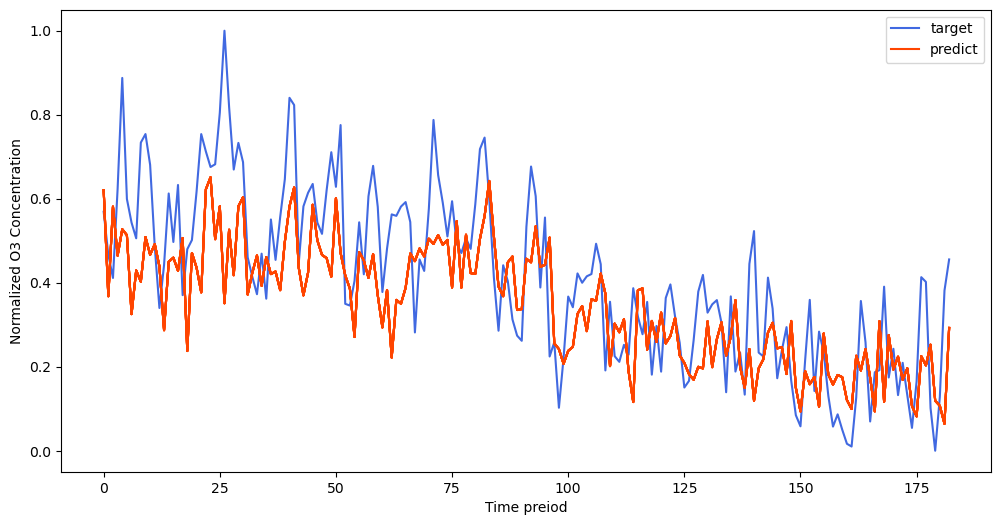

RMSE: 0.15366547232113922
MAE: 0.12218677662158621
R-squared: 0.4351764484117846


In [24]:
import os # LSTM layer 갯수 조절 - 6개 / 200번 러닝 / 뉴런 128개 / dense 8 /
# input - 일조합(hr), 일조율(%), 일사합(MJ/m2), 평균기온(℃), 최고기온(℃), O3(ppm)
os.environ['KMP_DUPLICATE_LIB_OK']='True'
plt.figure(figsize=(12, 6))  # 그래프 크기 조정
plt.plot(testY,'#4169E1')
plt.plot(test_predict,'#FF4500')
plt.xlabel('Time preiod')
plt.ylabel('Normalized O3 Concentration')
plt.legend(['target','predict'])
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 예측 성능 평가
rmse = np.sqrt(mean_squared_error(testY, test_predict[:, 1]))  # 수정된 부분
mae = mean_absolute_error(testY, test_predict[:, 1])  # 수정된 부분
r2 = r2_score(testY, test_predict[:, 1])  # 수정된 부분

# 결과 출력
print('RMSE:', rmse)
print('MAE:', mae)
print('R-squared:', r2)

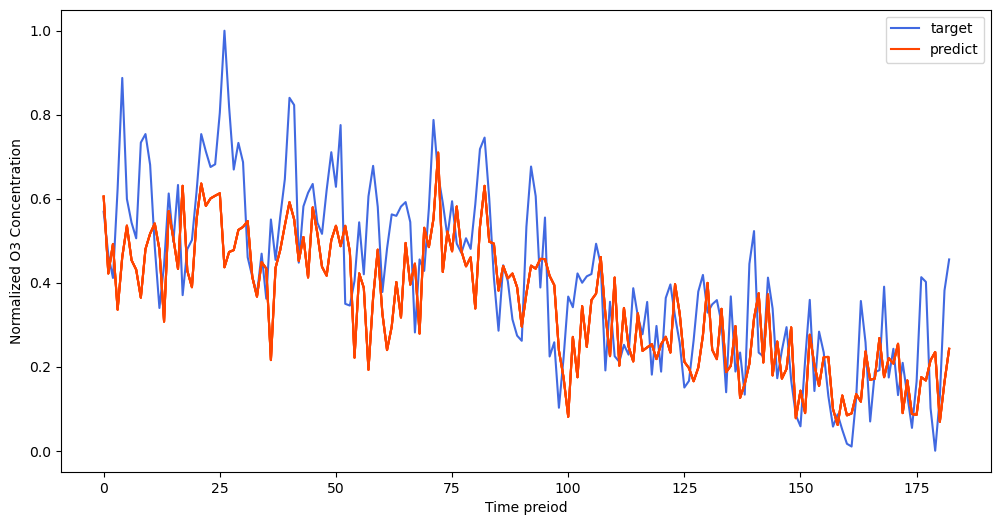

RMSE: 0.1526343450906292
MAE: 0.12158547477382672
R-squared: 0.4427311828182372


In [29]:
import os # LSTM layer 갯수 조절 - 6개 / 200번 러닝 / 뉴런 256개 / dense 4 /
# input - 일조합(hr), 일조율(%), 일사합(MJ/m2), 평균기온(℃), 최고기온(℃), O3(ppm)
os.environ['KMP_DUPLICATE_LIB_OK']='True'
plt.figure(figsize=(12, 6))  # 그래프 크기 조정
plt.plot(testY,'#4169E1')
plt.plot(test_predict,'#FF4500')
plt.xlabel('Time preiod')
plt.ylabel('Normalized O3 Concentration')
plt.legend(['target','predict'])
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 예측 성능 평가
rmse = np.sqrt(mean_squared_error(testY, test_predict[:, 1]))  # 수정된 부분
mae = mean_absolute_error(testY, test_predict[:, 1])  # 수정된 부분
r2 = r2_score(testY, test_predict[:, 1])  # 수정된 부분

# 결과 출력
print('RMSE:', rmse)
print('MAE:', mae)
print('R-squared:', r2)

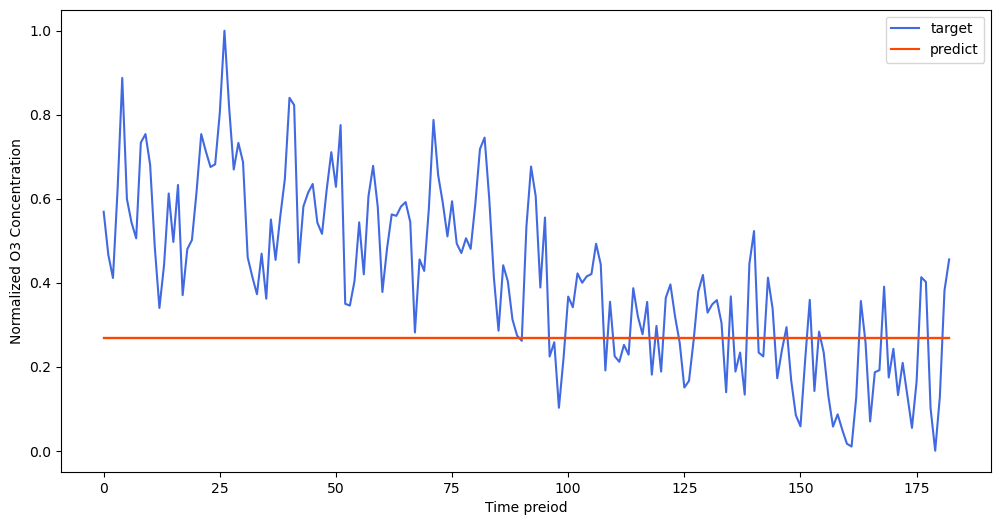

RMSE: 0.2506154374177786
MAE: 0.202945613312491
R-squared: -0.5023663415939714


In [46]:
import os # LSTM layer 갯수 조절 - 6개 / 200번 러닝 / 뉴런 128개 / dense 4 /
# input - 일조합(hr), 일사합(MJ/m2), O3(ppm)
os.environ['KMP_DUPLICATE_LIB_OK']='True'
plt.figure(figsize=(12, 6))  # 그래프 크기 조정
plt.plot(testY,'#4169E1')
plt.plot(test_predict,'#FF4500')
plt.xlabel('Time preiod')
plt.ylabel('Normalized O3 Concentration')
plt.legend(['target','predict'])
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 예측 성능 평가
rmse = np.sqrt(mean_squared_error(testY, test_predict[:, 1]))  # 수정된 부분
mae = mean_absolute_error(testY, test_predict[:, 1])  # 수정된 부분
r2 = r2_score(testY, test_predict[:, 1])  # 수정된 부분

# 결과 출력
print('RMSE:', rmse)
print('MAE:', mae)
print('R-squared:', r2)

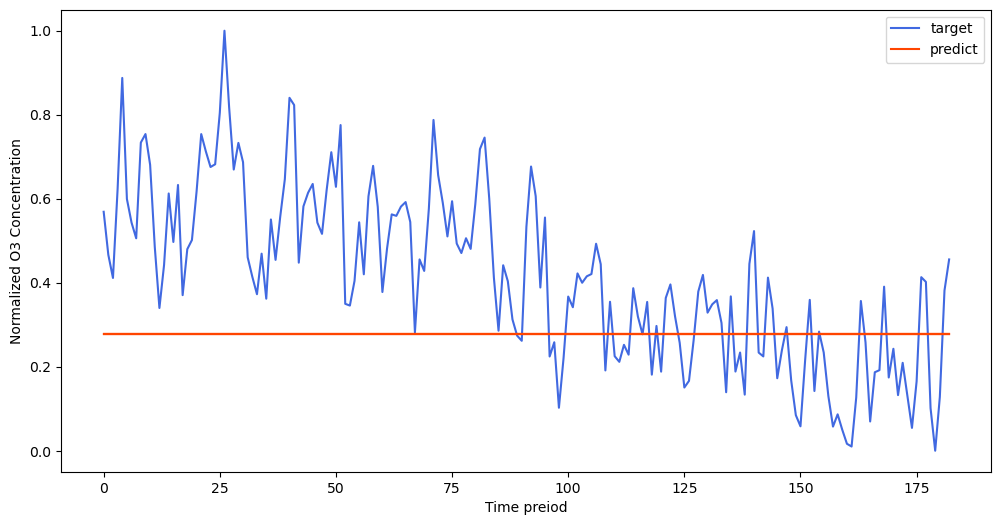

RMSE: 0.24530160240540466
MAE: 0.19883064983597493
R-squared: -0.43933198794606065


In [62]:
import os # LSTM layer 갯수 조절 - 6개 / 200번 러닝 / 뉴런 128개 / dense 4 /
# input - 최고기온, 일사합(MJ/m2), O3(ppm)
os.environ['KMP_DUPLICATE_LIB_OK']='True'
plt.figure(figsize=(12, 6))  # 그래프 크기 조정
plt.plot(testY,'#4169E1')
plt.plot(test_predict,'#FF4500')
plt.xlabel('Time preiod')
plt.ylabel('Normalized O3 Concentration')
plt.legend(['target','predict'])
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 예측 성능 평가
rmse = np.sqrt(mean_squared_error(testY, test_predict[:, 1]))  # 수정된 부분
mae = mean_absolute_error(testY, test_predict[:, 1])  # 수정된 부분
r2 = r2_score(testY, test_predict[:, 1])  # 수정된 부분

# 결과 출력
print('RMSE:', rmse)
print('MAE:', mae)
print('R-squared:', r2)